<a href="https://colab.research.google.com/github/Heavymetal17/ML-uses-in-Finance/blob/main/Ml_credit_card_fraud_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



In [2]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
df = pd.read_csv("creditcard.csv")


In [3]:
## link to data https://www.kaggle.com/mlg-ulb/creditcardfraud/download

In [4]:
# Grab a peek at the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print(df.shape)    #print shape of data
# data = data.sample(frac = 0.1, random_state = 48)
print(df.describe())


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [6]:
# determine the no. of frauds in dataset
frauds = df[(df['Class']==1)]
valids = df[(df['Class']==0)]
ratio=float(len(frauds))/float(len(valids))
print(ratio)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))



0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [7]:
#highly imbalanced data coz only 0.17 percent are frauds
#if model does'nt give good accuracy we would need to balance the data

In [8]:
print('Details of the fraudulent transaction amount')
frauds.Amount.describe()


Details of the fraudulent transaction amount


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('details of valid transaction')
valids.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

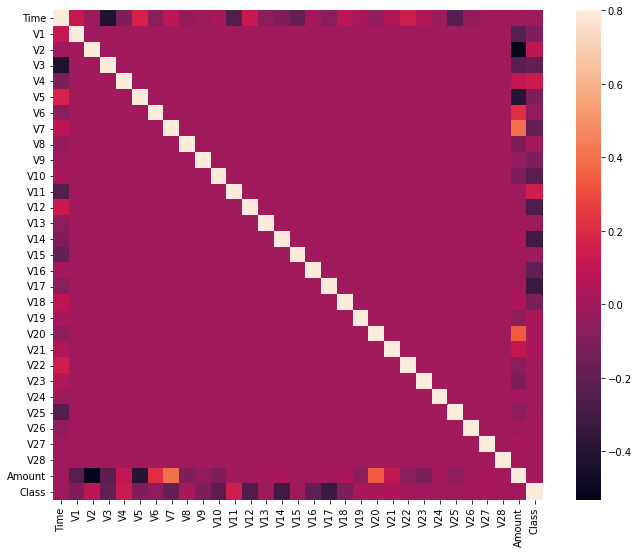

In [10]:
# Correlation matrix
cormatrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormatrix, vmax = .8, square = True)
plt.show()


In [11]:
df.isnull().sum().sum()
df1 = df[df.isnull().any(axis=1)]
#df = df.reset_index(drop=True)
df1

df = df.dropna()
df = df.reset_index(drop=True)
df2 = df[df.isnull().any(axis=1)]

In [12]:
# dividing the X and the Y from the dataset
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)



(284807, 30)
(284807,)


In [13]:
# Using Scikit-learn 
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.2, random_state = 42)


In [14]:
Xtest.isnull().values.any()
#Xtest.isnull().sum()
Xtest.isnull().sum().sum()

0

In [15]:
#Building Random forest model
from sklearn.ensemble import RandomForestClassifier
#creating model
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
#predictions
#Ypred = rfc.predict(Xtest)
#Xtest = Xtest.reset_index()


RandomForestClassifier()

In [16]:
Ypred = rfc.predict(Xtest)

In [17]:
#evaluating paramenters
# Evaluating the classifier
# printing every score of the classifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(frauds)
n_errors = (Ypred != Ytest).sum()
#outputs
print("The model used is Random Forest classifier")

acc = accuracy_score(Ytest, Ypred)
print("The accuracy is {}".format(acc))

prec = precision_score(Ytest, Ypred)
print("The precision is {}".format(prec))

rec = recall_score(Ytest, Ypred)
print("The recall is {}".format(rec))

f1 = f1_score(Ytest, Ypred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(Ytest, Ypred)
print("The Matthews correlation coefficient is {}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.9871794871794872
The recall is 0.7857142857142857
The F1-Score is 0.8750000000000001
The Matthews correlation coefficient is 0.8805302991855358


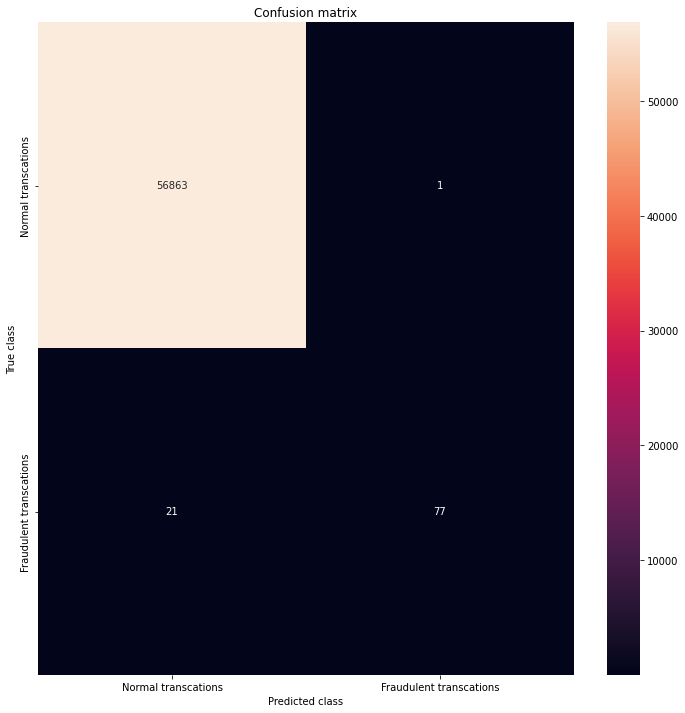

In [18]:
# printing the confusion matrix
LABELS = ['Normal transcations', 'Fraudulent transcations']
conf_matrix = confusion_matrix(Ytest, Ypred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [19]:
#pip install pycaret

In [25]:
# Importing module and initializing setup
from pycaret.classification import * 
clf1 = setup(data = df, target = 'Class')


,Description,Value
0,session_id,5075
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [26]:
# command used for comparing all the models available in the library
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9382,0.7591,0.9407,0.8379,0.8376,0.8436,18.144
lda,Linear Discriminant Analysis,0.9994,0.8953,0.7619,0.8587,0.8051,0.8048,0.8074,1.364
lr,Logistic Regression,0.9991,0.9390,0.6081,0.8476,0.7029,0.7025,0.7148,7.365
dt,Decision Tree Classifier,0.9991,0.8603,0.7210,0.7618,0.7380,0.7376,0.7393,11.696
ridge,Ridge Classifier,0.9989,0.0000,0.4161,0.8440,0.5555,0.5550,0.5910,0.162
knn,K Neighbors Classifier,0.9984,0.5929,0.0495,0.8000,0.0925,0.0924,0.1950,2.632
dummy,Dummy Classifier,0.9983,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.091
svm,SVM - Linear Kernel,0.9982,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0003,6.603
lightgbm,Light Gradient Boosting Machine,0.9965,0.7268,0.5782,0.2687,0.3651,0.3636,0.3916,3.506
nb,Naive Bayes,0.9922,0.9632,0.6311,0.1324,0.2186,0.2164,0.2864,0.155


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5075, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5075, verbose=0,
                     warm_start=False)